## EEG

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import mne

path = 'D:\One_한양대학교\private object minsu\coding\data\EEG_fnirs_cognitive_open\datasetA'
data = loadmat(f'{path}/EEG/subject 01/with occular artifact/cnt.mat')
event = loadmat(f'{path}/EEG/subject 01/with occular artifact/mrk.mat')

In [2]:
i = 0
eeg = np.array(data['cnt'][0][i]['x'][0][0].T, float)
eeg = mne.io.RawArray(eeg, mne.create_info([data['cnt'][0][i]['clab'][0][0][0][m][0] for m in range(32)], 200, ['eeg']*30+['eog']*2))
events = event['mrk'][0][i]['time'][0][0][0]
labels = event['mrk'][0][i]['y'][0][0][0]
eeg

Creating RawArray with float64 data, n_channels=32, n_times=120436
    Range : 0 ... 120435 =      0.000 ...   602.175 secs


Ready.


<RawArray | 32 x 120436 (602.2 s), ~29.4 MB, data loaded>

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


C:\Users\user\AppData\Local\Temp\ipykernel_16764\1230442022.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg.plot_psd()
c:\Users\user\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


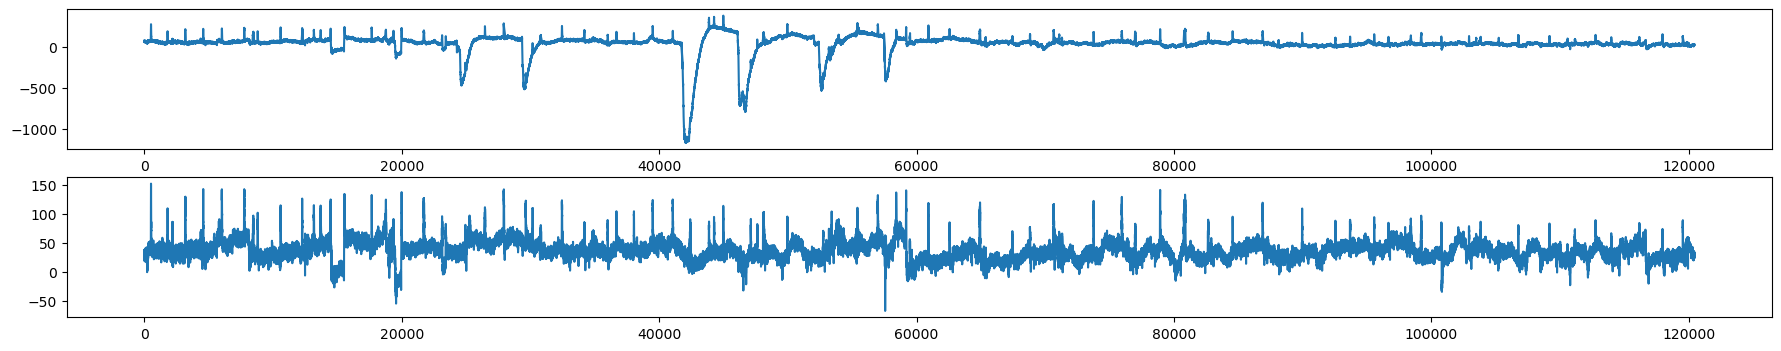

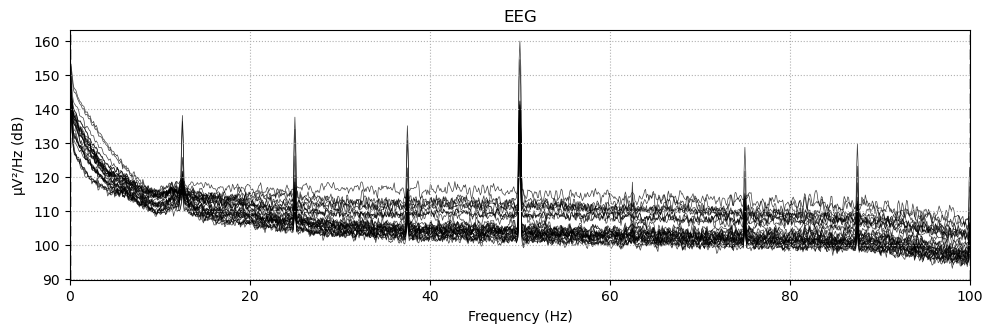

In [3]:
# Common average re-referencing
plt.figure(figsize=(22,4))
plt.subplot(211)
plt.plot(eeg['eeg'][0][0])

eeg.set_eeg_reference()

plt.subplot(212)
plt.plot(eeg['eeg'][0][0])
eeg.plot_psd()
plt.show()

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\user\AppData\Local\Temp\ipykernel_16764\2533938059.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg.plot_psd()
c:\Users\user\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


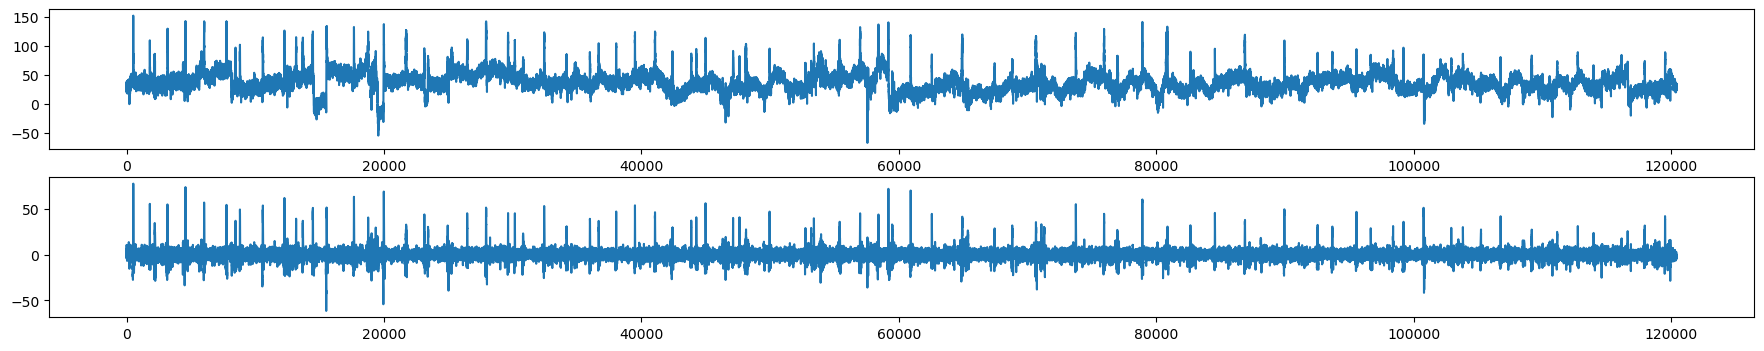

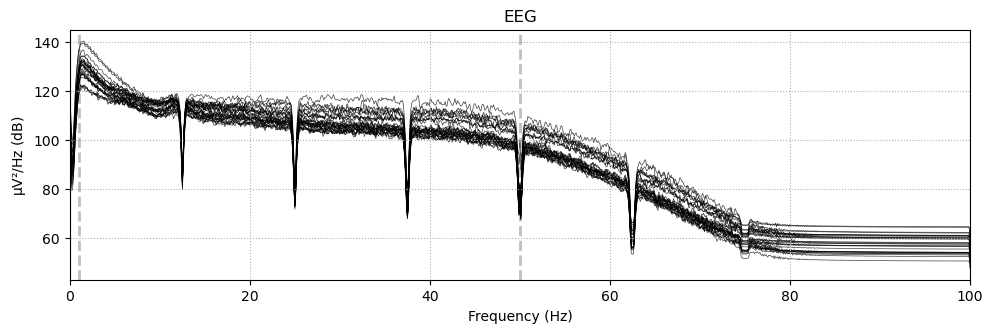

In [4]:
plt.figure(figsize=(22,4))
plt.subplot(211)
plt.plot(eeg['eeg'][0][0])

eeg.notch_filter([12.5 * n for n in range(1,7)])
eeg.filter(1,50, method='iir', iir_params=dict(order=3, ftype='butter'))
plt.subplot(212)
plt.plot(eeg['eeg'][0][0])
eeg.plot_psd()
plt.show()

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 25 components
Fitting ICA took 1.0s.
Using EOG channels: VEOG, HEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0

Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

Creating RawArray with float64 data, n_channels=27, n_times=120436
    Range : 0 ... 120435 =      0.000 ...   602.175 secs
Ready.
Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


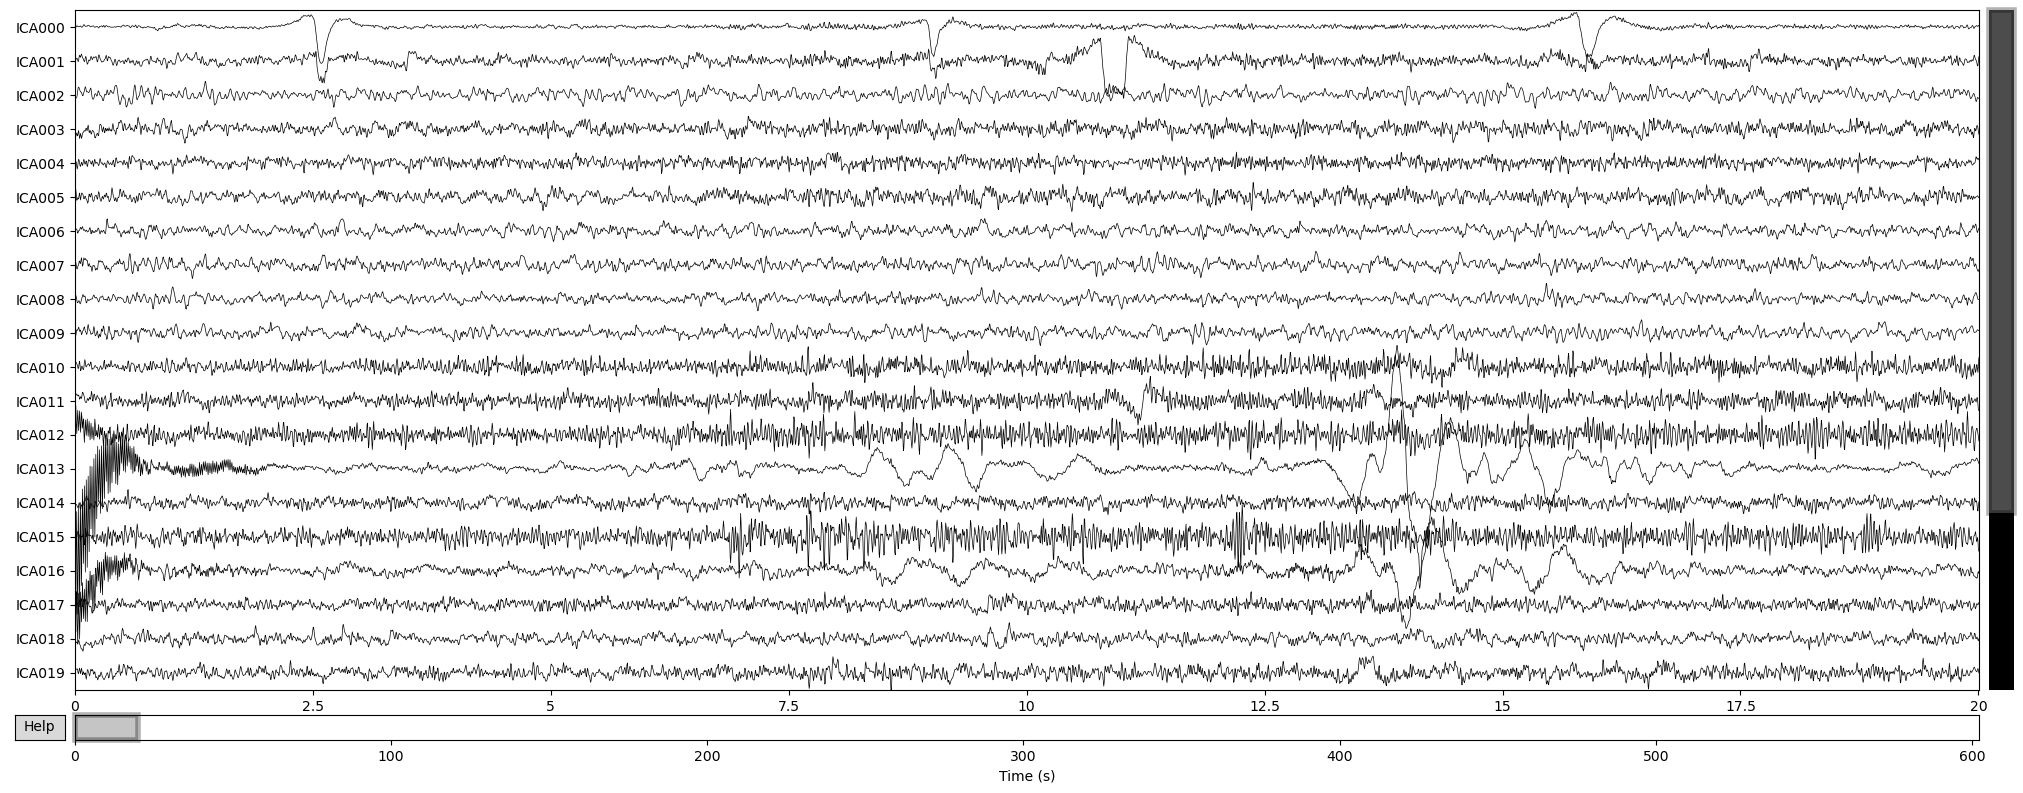

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components


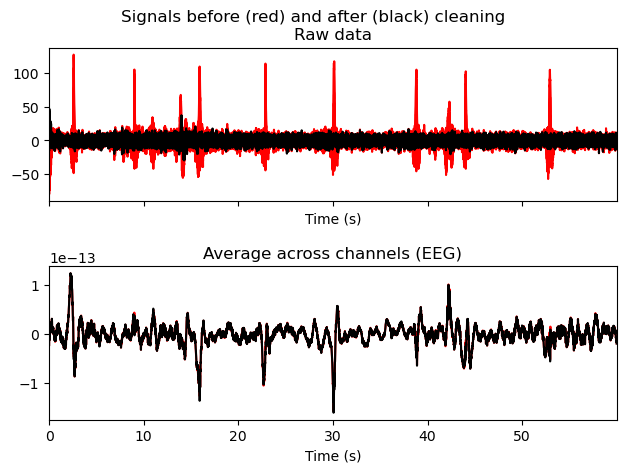

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components



In [5]:
# ica
ica = mne.preprocessing.ICA(n_components=25, random_state=22)
ica.fit(eeg)
eog_indices, eog_scores = ica.find_bads_eog(eeg, ch_name=['VEOG', 'HEOG'])
ica.plot_sources(eeg, show_scrollbars=True)
ica.plot_overlay(eeg, exclude=eog_indices, start=200*0, stop=200*60, picks=['eeg'])
ica.exclude = eog_indices
ica.apply(eeg)

print()

In [6]:
eeg._data[0, events[0]:events[0]+200*10]
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
      dtype=uint8)

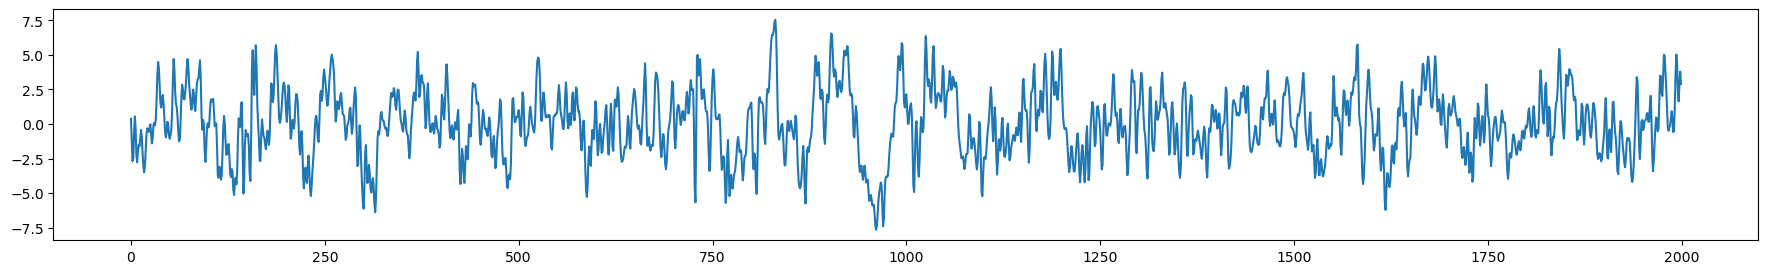

In [7]:
plt.figure(figsize=(22,3))
plt.plot(eeg._data[0,events[0]:events[0]+200*10])
plt.show()

## FNIRS

In [8]:
data = loadmat(f'{path}/NIRS/subject 01/cnt_processed.mat')
event = loadmat(f'{path}/NIRS/subject 01/mrk.mat')

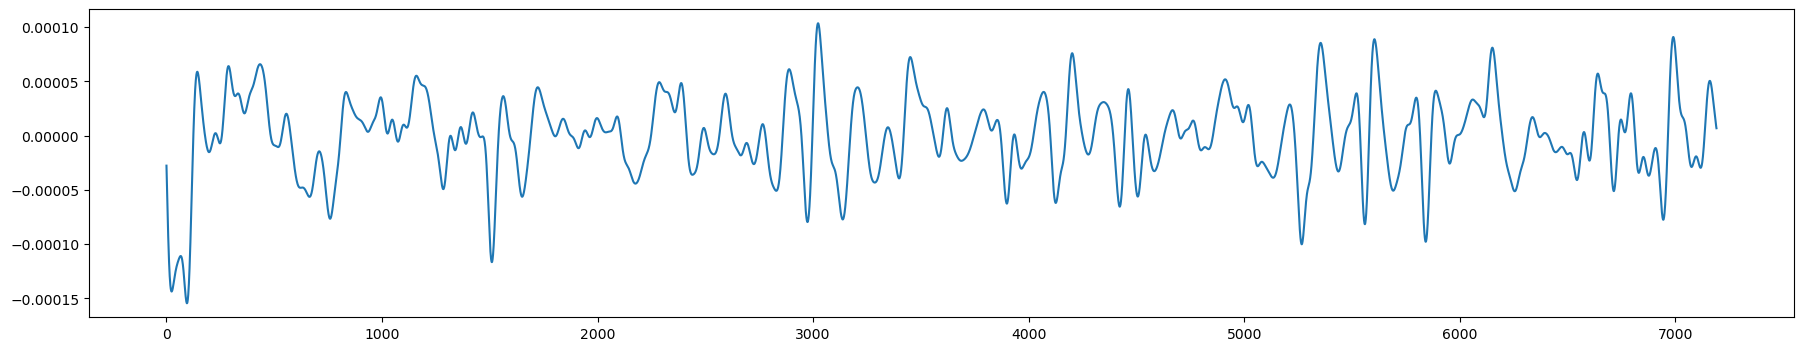

In [9]:
i = 0
eeg = np.array(data['out'][0][i]['x'][0][0].T, float) #*1e6
events = event['mrk'][0][i]['time'][0][0][0]//100
labels = event['mrk'][0][i]['y'][0][0][0]

plt.figure(figsize=(22,4))
plt.plot(eeg[0])
plt.show()

In [13]:
MI = np.load(f'D:\One_한양대학교\private object minsu\coding\data\EEG_fnirs_cognitive_open/MI.npz')
MA = np.load(f'D:\One_한양대학교\private object minsu\coding\data\EEG_fnirs_cognitive_open/MA.npz')

print(MI['eeg'].shape)
print(MI['fnirs'].shape)
print(MI['label'].shape)

print(MA['eeg'].shape)
print(MA['fnirs'].shape)
print(MA['label'].shape)

(29, 60, 30, 2000)
(29, 60, 72, 100)
(29, 60)
(29, 60, 30, 2000)
(29, 60, 72, 100)
(29, 60)


[1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0]


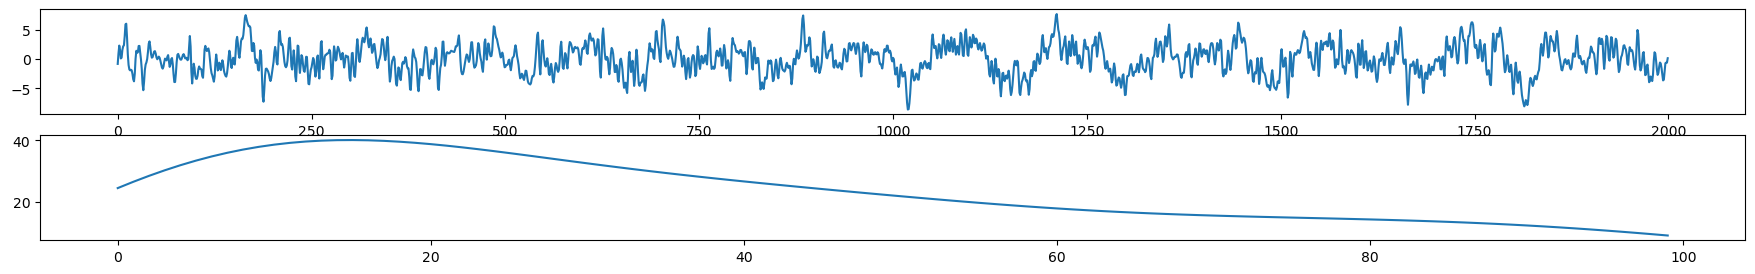

In [21]:
plt.figure(figsize=(22,3))
plt.subplot(211)
plt.plot(MI['eeg'][0,0,0])
plt.subplot(212)
plt.plot(MI['fnirs'][0,0,0])
print(MI['label'][0])
plt.show()